# **Final Project 4 - Clustering**

**Kelompok 4 - PYTN-KS-014**
1. Hafidah Dwi Cahyani (PYTN-KS14-003)
2. Putri Dresty Faristuta (PYTN-KS14-022)
3. Aulia Putri Hidayat (PYTN-KS14-023)

### A.1 Introduction
------

#### 1.1 Latar Belakang
Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Kartu kredit itu sendiri diartikan sebagai alat pembayaran berupa kartu yang biaya pembayaran dalam suatu transaksinya ditanggung terlebih dahulu oleh penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Kartu kredit dengan kartu debit perbedaannya hanya terletak pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.

Pemegang kartu kredit akan dikenakan biaya tertentu atas penggunaan kartu kredit tersebut. Biaya tahunan dibebankan kepada pengguna kartu kredit sesuai dengan fasilitas yang diberikan oleh bank. Dalam banyak kasus, biaya tahunan tahun pertama sering kali diabaikan untuk keuntungan tambahan bagi pengguna kartu kredit. Selain itu, ada biaya keterlambatan dan bunga. Biaya keterlambatan pembayaran dikenakan jika pemegang kartu terlambat membayar tagihan. Selama periode ini, bunga akan dikenakan jika nasabah menggunakan kartu untuk pembayaran kredit atau cicilan. 

#### 1.2 Dataset
Dataset yang digunakan berasal dari open source yang didapatkan dari kaggle, yakni Credit Card Data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Dengan jumlah baris 8950 dan kolom 18.

#### 1.3 Objektif
Objektif yang ingin dicapai pada Final Project 4 ini guna mengevaluasi konsep Clustering, sebagai berikut:
- Memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mempersiapkan data untuk digunakan dalam Clustering
- Mengimplementasikan Clustering pada data yang diberikan


### B.2 Import Library
-----

In [1]:
# Main Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K-Means Clusterinng
from sklearn.cluster import KMeans
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
# Model Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

import warnings
warnings.filterwarnings("ignore")

### C.3 Data Loading
-----

In [5]:
# Membaca data file csv
df = pd.read_csv("https://raw.githubusercontent.com/auliaputrih/KampusMerdeka-FinalProject4/main/CC%20GENERAL.csv")

In [6]:
# Menampilkan 5 baris data teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [98]:
# Menampilkan record data terakhir
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [99]:
# Menampilkan dimensi dataframe (rows, columns)
df.shape

(8950, 18)

In [100]:
# Menampilkan daftar columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [101]:
# Menghitung nilai uniq setiap kolom
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [102]:
# Menampilkan informasi detail dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset ini berisi 18 kolom, yaitu:
1. custid: Identifikasi pemegang Kartu Kredit
2. balance: Saldo jumlah yang tersisa di akun untuk melakukan pembelian
3. balancefrequency: Seberapa sering Saldo diperbarui (1 = frequently updated, 0 = not frequently updated)
4. purchases: Jumlah pembelian yang dilakukan dari akun
5. oneoffpurchases: Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. installmentspurchases: Jumlah pembelian dilakukan secara cicilan
7. cashadvance: Uang muka diberikan oleh pengguna
8. purchasesfrequency: Seberapa sering Pembelian dilakukan (1 = frequently updated, 0 = not frequently updated)
9. oneoffpurchasesfrequency: Seberapa sering Pembelian terjadi sekaligus (1 = frequently updated, 0 = not frequently updated)
10. purchasesinstallmentsfrequency: Frekuensi Pembelian Angsuran (1 = frequently updated, 0 = not frequently updated)
11. cashadvancefrequency: Seberapa sering uang muka dibayarkan
12. cashadvanceTRX: Jumlah Transaksi yang dilakukan dengan "Cash in Advance/Bayar dimuka"
13. purchasesTRX: Jumlah transaksi pembelian yang dilakukan
14. creditlimit: Limit Kartu Kredit untuk pengguna
15. payments: Jumlah Pembayaran yang dilakukan oleh pengguna
16. minimum_payments: Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCfullpayment: Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. tenure: Jangka waktu layanan kartu kredit untuk pengguna

### D.4 Data Cleaning
-----

In [103]:
# Mengecek data kosong
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [104]:
# Menghapus data kosong pada kolom credit limit
df.dropna(subset=["CREDIT_LIMIT"], inplace=True)

Karena pada kolom **credit limit** hanya terdapat 1 data kosong, maka kita lakukan penghapusan missing value tersebut

In [105]:
# Mengubah data null dengan memasukkan nilai rata-rata
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

Dikarenakan data pada kolom **minimum payments** terdapat banyak data null, yakni sekitar 313 baris data, maka kita lakukan pengubahan missing value tersebut dengan memasukkan nilai rata-rata pada kolom tersebut.

In [106]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing value pada data credit card general sudah dibersihkan

In [107]:
# Melihat data terduplikasi
df.duplicated().sum()

0

Seperti yang kita lihat bahwa pada data sudah tidak terdapat missing value dan data terduplikat, sehingga data credit card sudah dapat memasuki tahap eksplorasi data untuk mendapatkan insight dari data tersebut.

### E.5 Exploratory Data Analysis
-----

In [108]:
# Melihat korelasi dalam data
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.394266,-0.319018,0.072421
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.114182,-0.095308,0.118566
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.093497,0.180356,0.086155
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.048583,0.132745,0.064047
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.131671,0.182548,0.086016
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.139209,-0.152961,-0.068552
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.002926,0.305761,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.029992,0.157497,0.082234
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.029554,0.250049,0.072926
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.097905,-0.249768,-0.133427


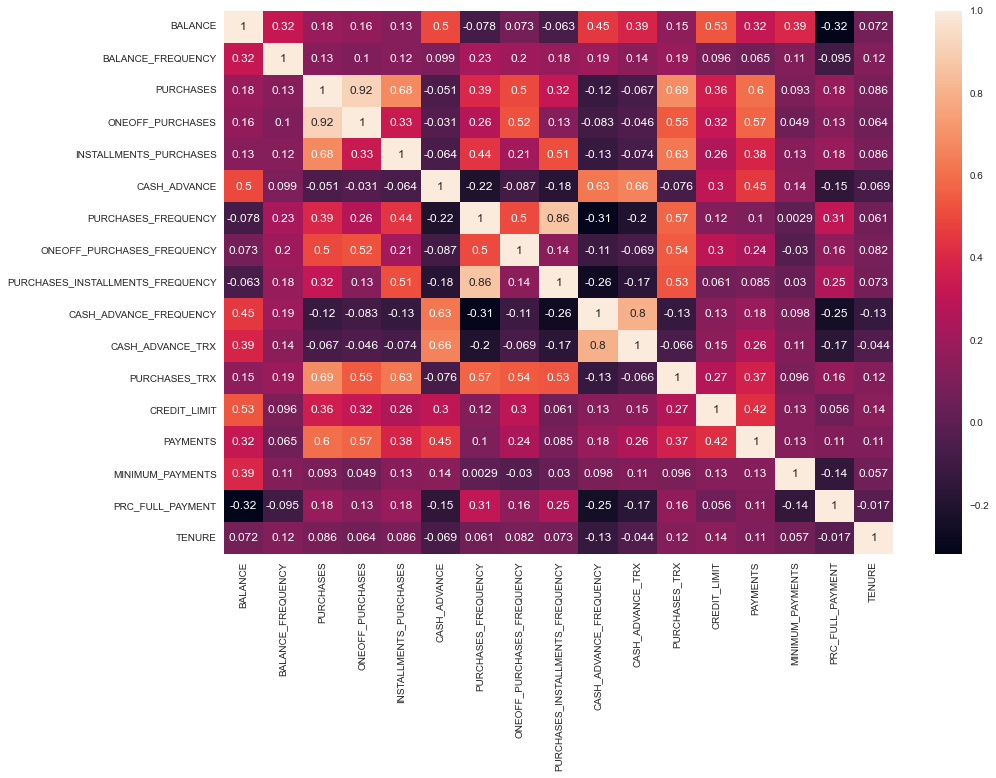

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

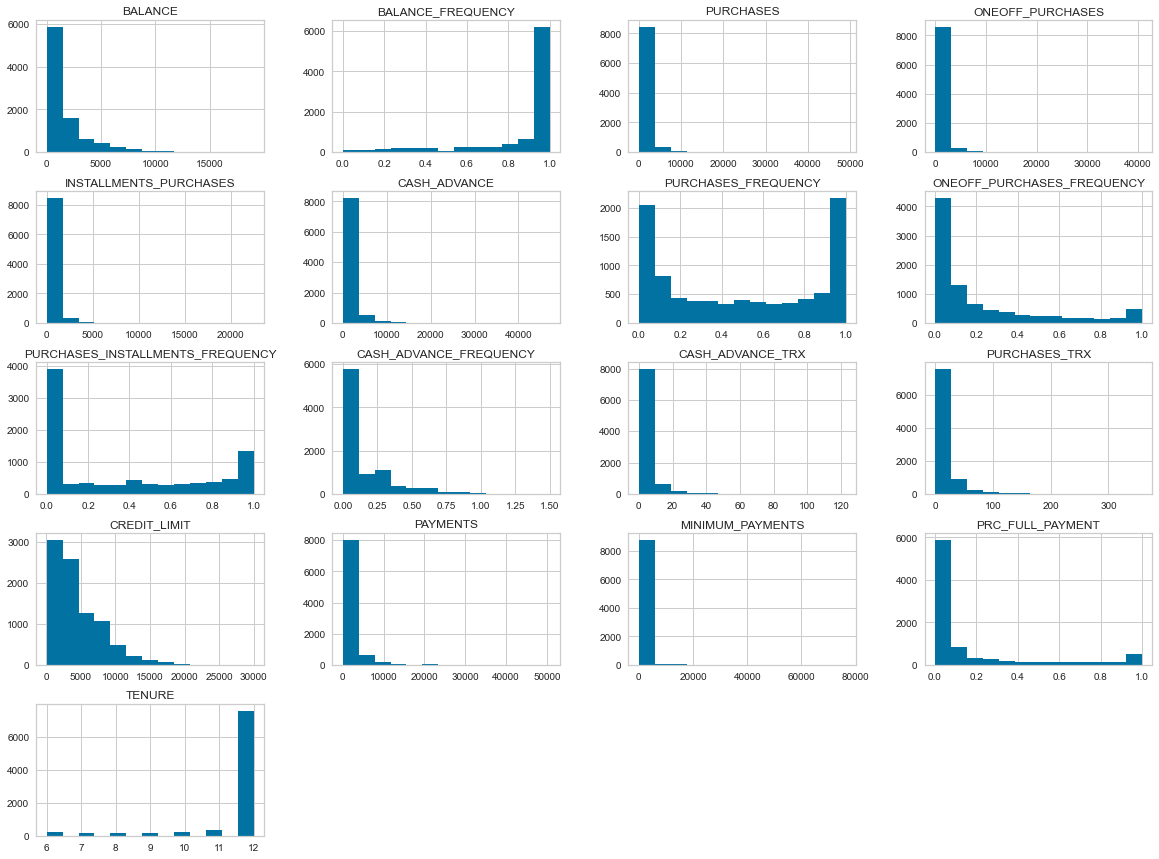

In [110]:
df.hist(bins=13, figsize=(20,15), layout=(5,4));

Grafik histogram di atas merupakan visualisasi seluruh data numerik pada data credit card

### F.6 Data Processing
-----

In [111]:
# Menghapus kolom tidak terpakai (CUST ID)
df.drop(columns=["CUST_ID"], inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.304943,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [112]:
# Melihat detail statistik data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Dari data di atas terlihat statistik data semua kolom mulai dari count, mean (rata-rata), std, nilai minimum, quartil, dan nilai maxnya.

In [113]:
# Menormalisasikan nilai masukan
minMax_scaler = MinMaxScaler()  
x = minMax_scaler.fit_transform(df)

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Dilakukan normalisasi pada dataset yang digunakan agar nilai data menjadi seimbang, karena jika terdapat nilai yang terlalu besar akan memiliki dampak pada proses pengolahan data. Pada scaler di atas menggunakan MinMaxScaler yang berfungsi untuk mengubah data berada di rentang 0 sampai 1.

In [114]:
df.shape

(8949, 17)

### G.7 Model Defining
-----

#### PCA

In [115]:
# Mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(x)
pca_data = pd.DataFrame(data=components,
                        columns=["Component 1", "Component 2", "Component 3"])

In [116]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 3 Component= ", sum(pca.explained_variance_ratio_))

[0.49602563 0.14056409 0.12846679]
Total informasi dari 3 Component=  0.7650565126928509


Metode diatas digunakan untuk mendapatkan rasio varians. Jadi pada

PCA 1 itu memiliki nilai varians sebanyak 50% dari 100%, dan

PCA 2 memiliki nilai 14% dari 100%.

PCA 3 memiliki nilai 13% dari 100%.

Sehingga jika di jumlahkan ketiga-nya memiliki sekitar 77% dari 100%.

In [117]:
pca_data.head()

,Component 1,Component 2,Component 3
0,-0.482267,-0.097885,-0.046148
1,-0.608710,-0.019547,0.082484
2,0.304349,0.921080,0.010533
3,-0.588696,-0.005649,0.036998
4,-0.554500,0.052608,-0.084012


Kita dapat melihat detail data-nya dengan mengakses pca_data

Setelah mengurangi atribut menjadi 3 dimensi, kita akan melakukan pengelompokan dengan menggunakan elbow method
Langkah-langkah yang dilakukan dalam Clustering
- Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
- Memeriksa cluster yang terbentuk melalui scatter plot

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk: 


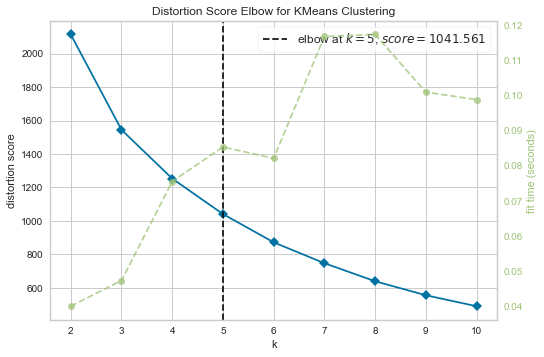

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make
print("Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk: ")
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(pca_data)
Elb.show()

Berdasarkan visualisasi elbow method di atas, nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5

### H.8 Model Training
-----

#### K-Means

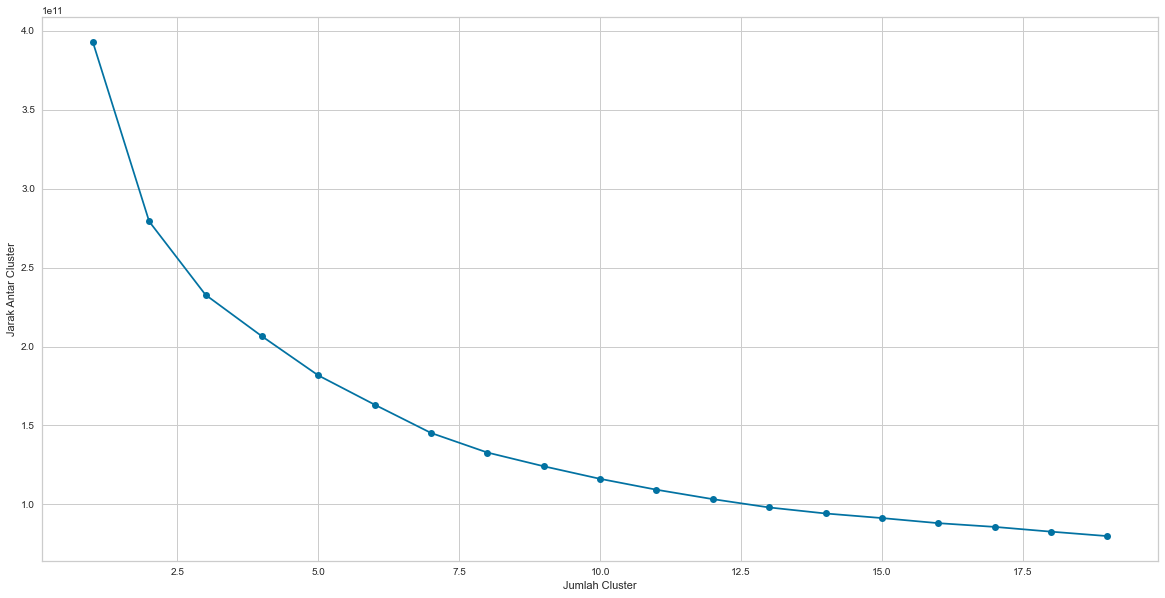

In [119]:
cost=[]
for i in range(1,20):
    kmean= KMeans(n_clusters = i,init ="k-means++", max_iter=300,random_state=40)
    kmean.fit(df)
    cost.append(kmean.inertia_)


plt.figure(figsize=(20,10))
plt.plot(range(1, 20), cost, marker="o", color="b")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Jarak Antar Cluster")
plt.show()

In [123]:
# Mendefinisikan model kmeans dengan jumlah cluster sebanyak 5
kmean = KMeans(n_clusters = 5,init ="k-means++", max_iter=300,random_state=35)
kmean.fit(x)
labels = kmean.labels_
kmean.cluster_centers_.shape

(5, 17)

In [125]:
y_kmeans= kmean.fit_predict(pca_data)

labels = kmean.labels_

cluster = kmean.cluster_centers_
centroids = np.array(cluster)


df["Class"] = labels; pca_data["Class"] = labels

pca_data

,Component 1,Component 2,Component 3,Class
0,-0.482267,-0.097885,-0.046148,1
1,-0.608710,-0.019547,0.082484,1
2,0.304349,0.921080,0.010533,4
3,-0.588696,-0.005649,0.036998,1
4,-0.554500,0.052608,-0.084012,1
...,...,...,...,...
8944,0.647100,-0.462152,0.210428,3
8945,0.550066,-0.406322,-0.214763,0
8946,0.360590,-0.421831,0.105782,3
8947,-0.645929,-0.203465,0.281545,1


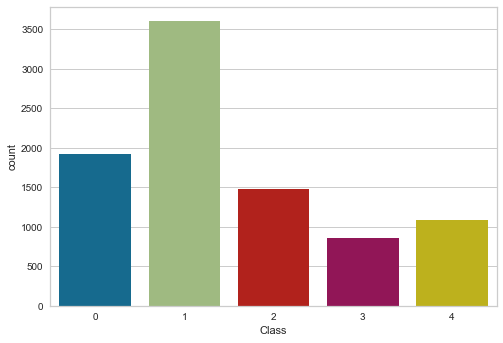

In [126]:
sns.countplot(x="Class", data=df)
plt.show()

In [127]:
clusters = pd.DataFrame(df,columns = df.columns)
clusters["CLUSTERS"] = labels
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Class,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,1


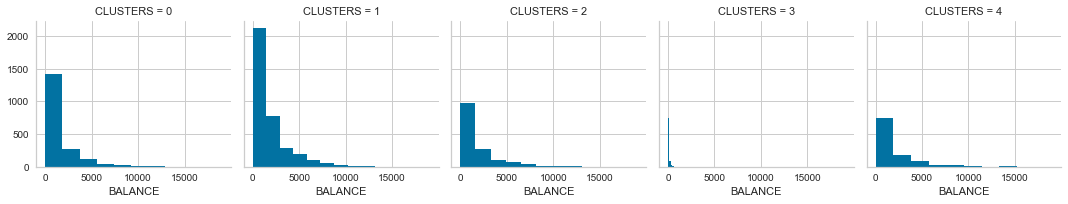

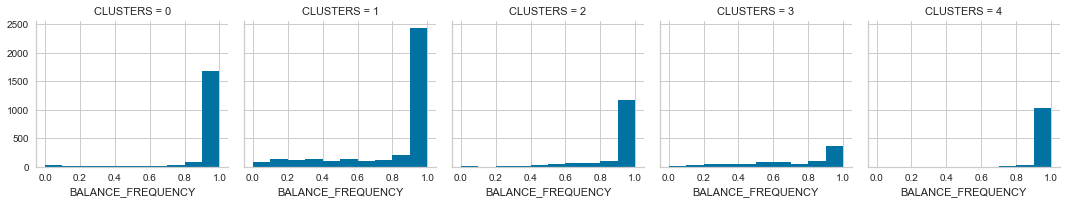

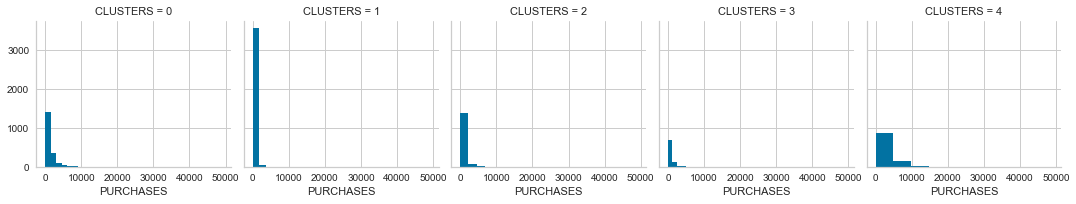

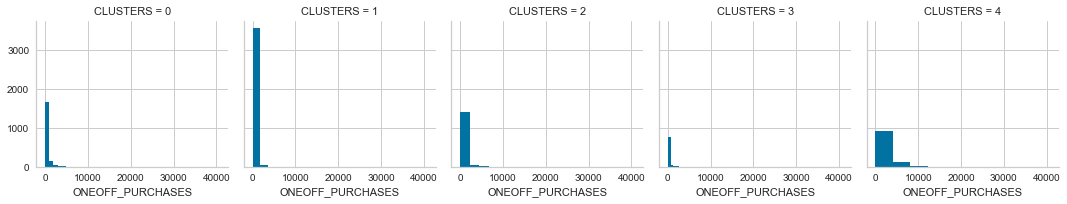

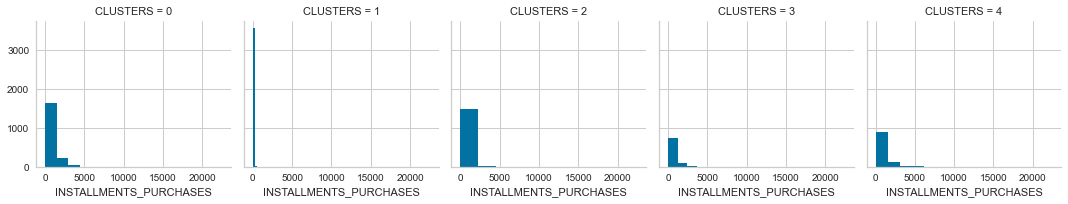

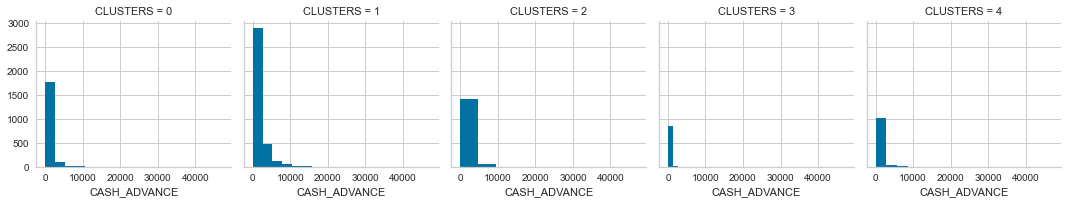

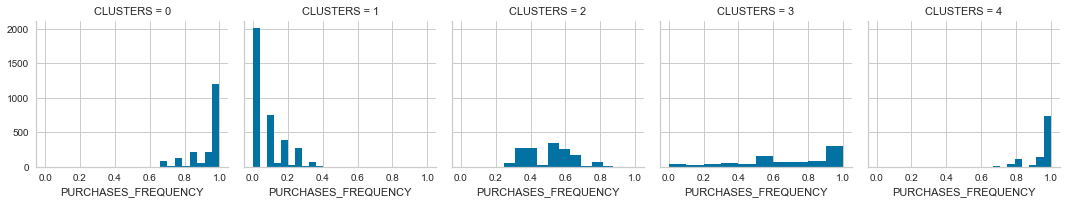

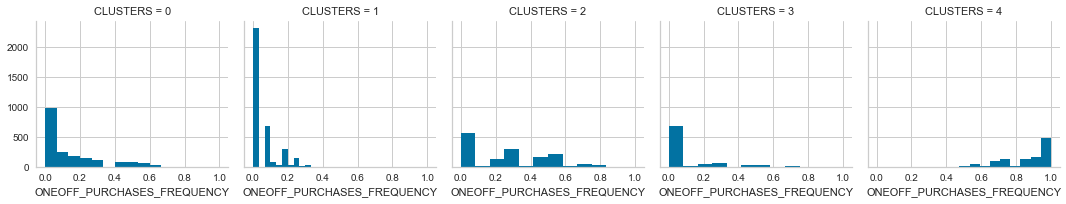

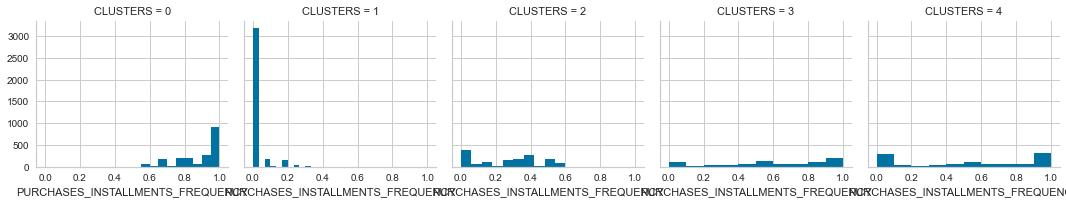

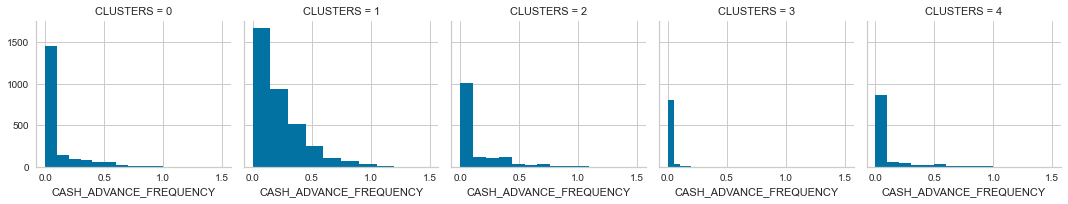

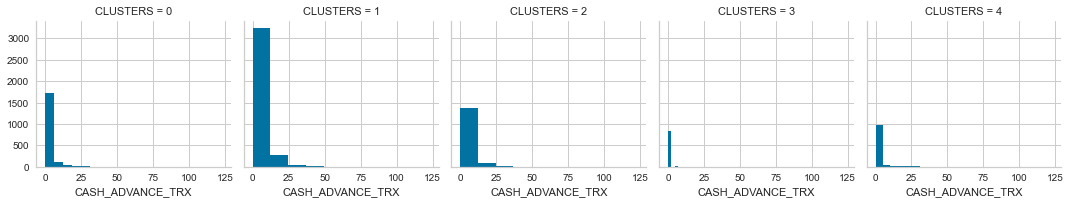

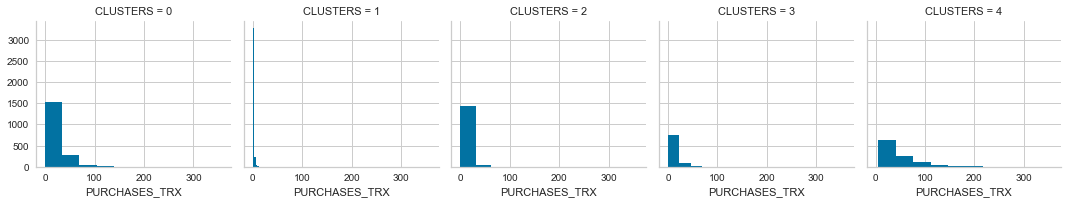

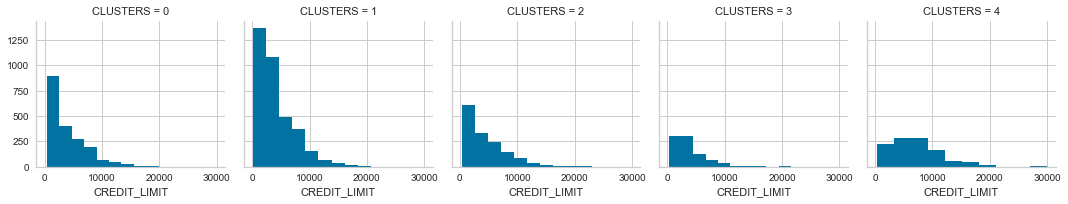

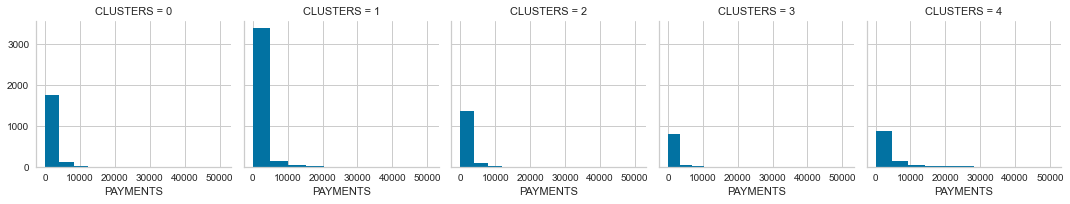

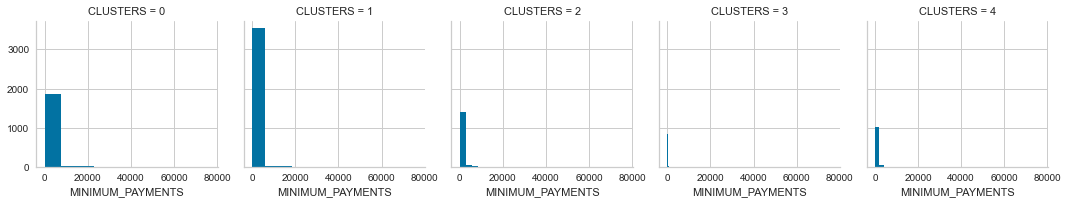

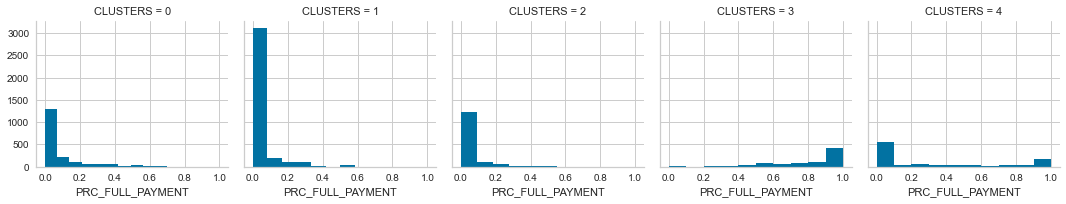

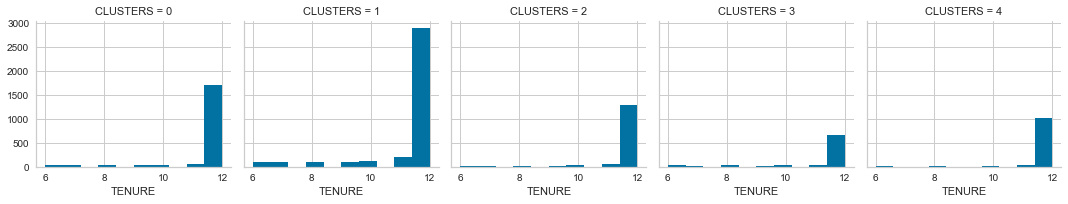

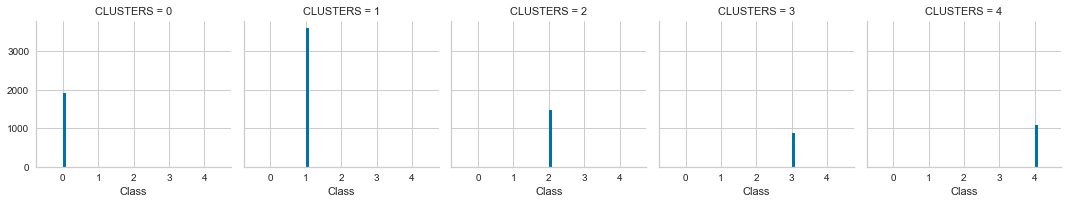

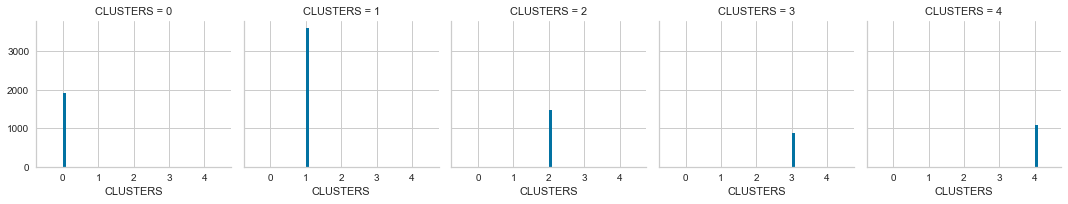

In [128]:
for i in clusters:
    grid= sns.FacetGrid(clusters, col="CLUSTERS")
    grid.map(plt.hist, i)

Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 5 clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda, yaitu:
- Cluster 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
- Cluster 1: limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo  
- Cluster 2: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
- Cluster 3: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo  
- Cluster 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

### I.9 Model Evaluation
-----

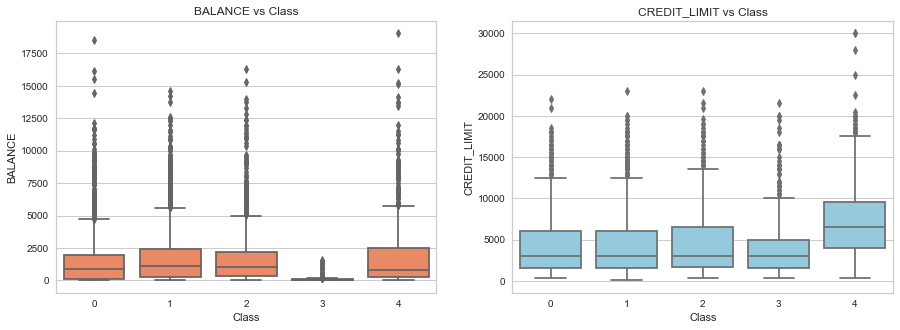

In [129]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "Class", y = "BALANCE", data  = df, color = "coral");
plt.title("BALANCE vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = "Class", y = "CREDIT_LIMIT", data  = df, color = "skyblue");
plt.title("CREDIT_LIMIT vs Class")

plt.show()

Perbandingan antara balance vs class dan credit_limit vs class, menghasilkan informasi bahwa semakin tinggi balance suatu class, maka credit_limit juga akan semakin tinggi juga. Sehingga dihasilkan kesimpulan sebagai berikut:
- Class 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
- Class 1: limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo  
- Class 2: limit kredit pengguna rata-rata & Pengguna cukup sering memperbaharui isi saldo  
- Class 3: limit kredit pengguna tinggi & Pengguna sering memperbaharui isi saldo  
- Class 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

### J.10 Model Inference
-----

Selanjutnya akan kita coba model yang sudah kita buat dengan dataset lain selain data yang sudah tersedia. Disini kita menggunakan dataset diabetes untuk percobaan-nya.

In [132]:
data = pd.read_csv("wine-clustering.csv")
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [134]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [137]:
data.shape

(178, 13)

In [138]:
data.drop(["OD280", "Ash_Alcanity", "Nonflavanoid_Phenols"], axis=1, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic_Acid       178 non-null    float64
 2   Ash              178 non-null    float64
 3   Magnesium        178 non-null    int64  
 4   Total_Phenols    178 non-null    float64
 5   Flavanoids       178 non-null    float64
 6   Proanthocyanins  178 non-null    float64
 7   Color_Intensity  178 non-null    float64
 8   Hue              178 non-null    float64
 9   Proline          178 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 14.0 KB


In [140]:
data.isnull().sum()

Alcohol            0
Malic_Acid         0
Ash                0
Magnesium          0
Total_Phenols      0
Flavanoids         0
Proanthocyanins    0
Color_Intensity    0
Hue                0
Proline            0
dtype: int64

In [141]:
data.duplicated().sum()

0

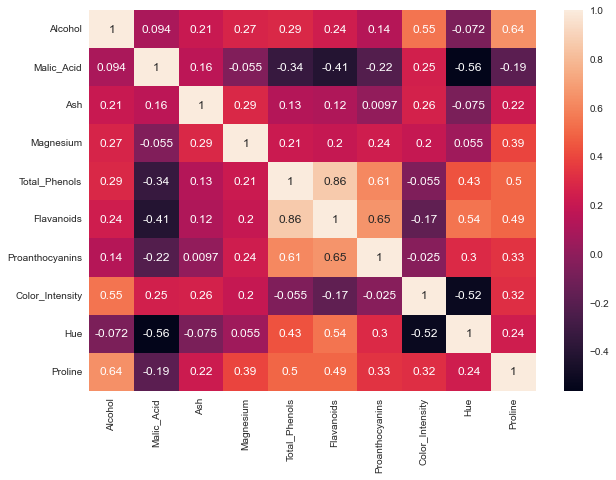

In [144]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [148]:
# Melakukan normalisasi data
mm_scaler = MinMaxScaler()  
x = mm_scaler.fit_transform(data)
x[: 5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.61956522, 0.62758621,
        0.57383966, 0.59305994, 0.37201365, 0.45528455, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.32608696, 0.57586207,
        0.51054852, 0.27444795, 0.26450512, 0.46341463, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.33695652, 0.62758621,
        0.61181435, 0.75709779, 0.37542662, 0.44715447, 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.4673913 , 0.98965517,
        0.66455696, 0.55835962, 0.55631399, 0.30894309, 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.52173913, 0.62758621,
        0.49578059, 0.44479495, 0.25938567, 0.45528455, 0.32596291]])

In [151]:
pca = PCA(n_components=3)
components = pca.fit_transform(x)
pca_data = pd.DataFrame(data=components,
                        columns=["Component 1", "Component 2", "Component 3"])

pca_data.head()

,Component 1,Component 2,Component 3
0,0.535094,-0.206140,-0.034588
1,0.255449,0.038917,-0.127155
2,0.499791,-0.107606,0.185940
3,0.806278,-0.448018,0.053091
4,0.235889,-0.038600,0.168433


In [152]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 3 Component: ", sum(pca.explained_variance_ratio_))

[0.38932977 0.24669993 0.09496145]
Total informasi dari 3 Component:  0.7309911563480211


### Conclusion
-----

Berdasarkan hasil analisis keseluruhan yang telah dilakukan, dapat disimpulkan bahwa:
- Project ini membahas tentang pengimplementasian algoritma Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah Principal Component Analysis (PCA) dan K-Means.
- Dalam mencari nilai optimal untuk menentukan jumlah clustering, digunakan teknik ELBOW METHOD.
- Diperoleh jumlah Cluster paling optimal, yaitu 5.
- Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 5 clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda, yaitu:
  1. Cluster 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
  2. Cluster 1: limit kredit rendah & Pengguna jarang memperbaharui isi saldo  
  3. Cluster 2: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
  4. Cluster 3: limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo  
  5. Cluster 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo